<a href="https://colab.research.google.com/github/wakana23/anime2021/blob/main/%E6%95%B0%E5%80%A4%E8%A8%88%E7%AE%97%E6%B3%95IDay4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#回帰



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
try:
    import japanize_matplotlib #matplotlibの日本語化  
except ModuleNotFoundError:
    import os
    os.system('pip3 install japanize_matplotlib')
    import japanize_matplotlib 
sns.set(font="IPAexGothic") #日本語フォント設定

In [ ]:
!wget https://kkuramitsu.github.io/lec/data/boston.csv
df = pd.read_csv('boston.csv')
df.drop('黒人', axis=1, inplace=True) # 黒人を除去する
df.head()

--2022-05-09 04:31:36--  https://kkuramitsu.github.io/lec/data/boston.csv
Resolving kkuramitsu.github.io (kkuramitsu.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to kkuramitsu.github.io (kkuramitsu.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35265 (34K) [text/csv]
Saving to: ‘boston.csv’

boston.csv          100%[===================>]  34.44K  --.-KB/s    in 0.003s  

2022-05-09 04:31:36 (9.79 MB/s) - ‘boston.csv’ saved [35265/35265]



,犯罪率,緑地,工場,川近,大気汚染,部屋数,築年,通勤,交通,資産税,教員比,低所得率,住宅価格
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## コギーくん（ベータテスト）


In [ ]:
!pip install -q git+https://github.com/kkuramitsu/kogi.git 
#!pip install -q kogi
from kogi import *

     |████████████████████████████████| 159 kB 5.5 MB/s 


## 最小２乗法

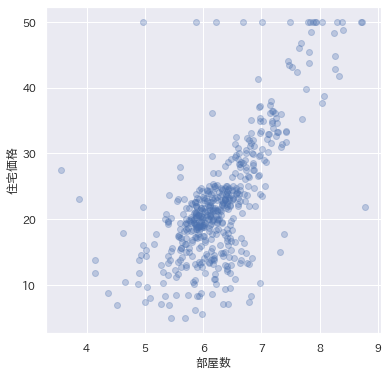

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(df['部屋数'], df['住宅価格'], alpha=0.3)
plt.xlabel('部屋数')
plt.ylabel('住宅価格')
plt.show()


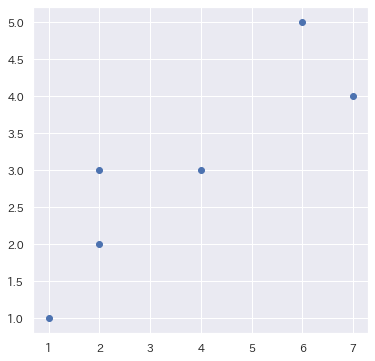

In [ ]:
x = [1,2,2,4,6,7]
y = [1,3,2,3,5,4]
plt.figure(figsize=(6, 6))
plt.scatter(x, y)
plt.show()


In [ ]:
def reg1dim(x, y):
    x = np.array(x)
    y = np.array(y)
    n = len(x)
    a = ((np.dot(x, y)- y.sum() * x.sum()/n) / ((x ** 2).sum() - x.sum()**2 / n))
    b = (y.sum() - a * x.sum())/n
    return a, b

x = [1,2,2,4,6,7]
y = [1,3,2,3,5,4]

a, b = reg1dim(x, y)
print("a =", a, "b =", b)


a = 0.5113636363636365 b = 1.1249999999999998


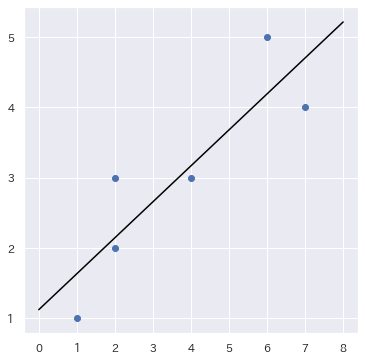

In [ ]:
plt.figure(figsize=(6, 6))
x = [1,2,2,4,6,7]
y = [1,3,2,3,5,4]
plt.scatter(x, y)

a, b = reg1dim(x, y)
x = np.linspace(0, 8, 10)
y = a * x + b
plt.plot(x, y, color="black")
plt.show()

In [ ]:
x = np.array([1,2,2,4,6,7])
y = np.array([1,3,2,3,5,4])

from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = x.reshape(-1, 1) # sklearn 用に変形
model.fit(x, y)
print(model.coef_, model.intercept_)

[0.51136364] 1.1250000000000002


## 説明変数

In [ ]:
X = df[['部屋数']]  # ひとつ選ぶ
y = df['住宅価格']
print(X.shape) #データ数と次元


(506, 1)


In [ ]:
X

,部屋数
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147
...,...
501,6.593
502,6.120
503,6.976
504,6.794


In [ ]:
X = df[['部屋数', '築年']]
y = df['住宅価格']
print(X.shape) #データ数と次元

(506, 2)


In [ ]:
X

,部屋数,築年
0,6.575,65.2
1,6.421,78.9
2,7.185,61.1
3,6.998,45.8
4,7.147,54.2
...,...,...
501,6.593,69.1
502,6.120,76.7
503,6.976,91.0
504,6.794,89.3


In [ ]:
X = df[['部屋数', '築年', '犯罪率']]
print(X.shape) #データ数と次元
X

(506, 3)


,部屋数,築年,犯罪率
0,6.575,65.2,0.00632
1,6.421,78.9,0.02731
2,7.185,61.1,0.02729
3,6.998,45.8,0.03237
4,7.147,54.2,0.06905
...,...,...,...
501,6.593,69.1,0.06263
502,6.120,76.7,0.04527
503,6.976,91.0,0.06076
504,6.794,89.3,0.10959


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [ ]:
X = df[['部屋数']]  # ひとつ選ぶ
y = df['住宅価格']


model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
print('a=', model.coef_, ', b=', model.intercept_)

a= [9.10210898] , b= -34.67062077643857


In [ ]:
model.predict([(4.00,)])


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1.73781515])

In [ ]:
X

,部屋数
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147
...,...
501,6.593
502,6.120
503,6.976
504,6.794


In [ ]:
y_pred = model.predict(X)
print(y_pred)
print(y)

[25.17574577 23.77402099 30.72803225 29.02593787 30.38215211 23.85593997
 20.05125842 21.50759586 16.5833549  19.97844155 23.3735282  20.02395209
 18.93169901 19.47782555 20.81583557 18.43108302 19.35039603 19.85101202
 14.99048582 17.45715736 16.02812625 19.6234593  21.23453259 18.23993873
 19.25027283 16.29208741 18.23993873 20.36983223 24.44757706 26.07685456
 17.32972783 20.59738496 19.48692766 17.22050253 20.81583557 19.33219181
 18.49479778 18.57671676 19.63256141 25.35778795 29.26259271 26.95065703
 21.48028953 21.86257811 20.57007863 17.04756245 17.99418179 20.21509638
 14.47166561 16.31939374 19.60525508 20.98877564 24.5932108  19.92382889
 18.9225969  31.31056723 23.42814085 27.36935404 21.26183891 19.27757916
 17.58458688 19.63256141 24.09259481 26.87784015 29.99076143 22.58164472
 18.0032839  18.83157581 16.24657686 18.89529058 23.73761256 19.58705086
 20.53367019 22.17204981 22.42690886 22.54523628 22.48152152 21.21632837
 22.05372239 18.79516738 26.55926634 25.57623857 22

In [ ]:
y_pred = model.predict(X)
pd.DataFrame({'実測': df['住宅価格'], '予測':y_pred}).head()

,実測,予測
0,24.0,25.175746
1,21.6,23.774021
2,34.7,30.728032
3,33.4,29.025938
4,36.2,30.382152


(0.0, 50.0)

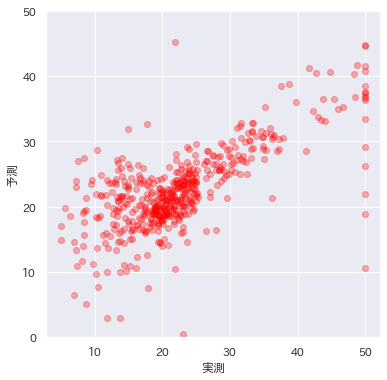

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred, color = 'red', alpha=0.3) 
plt.xlabel('実測')
plt.ylabel('予測')
plt.ylim(0, 50)

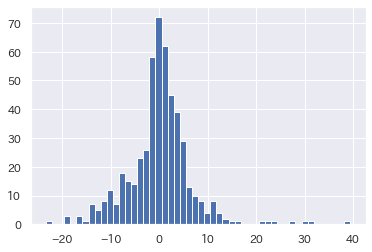

In [ ]:
plt.hist(y-y_pred, bins=50)
plt.show() 

## 定量評価

In [ ]:
from sklearn.metrics import mean_squared_error 

mse = mean_squared_error(y, y_pred) 
print('MSE:', mse) 

MSE: 43.60055177116956


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y, y_pred)
print('決定係数(R2):', r2)

決定係数(R2): 0.48352545599133423


In [ ]:
df

,犯罪率,緑地,工場,川近,大気汚染,部屋数,築年,通勤,交通,資産税,教員比,低所得率,住宅価格
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


決定係数(R2): 0.27623419331372456


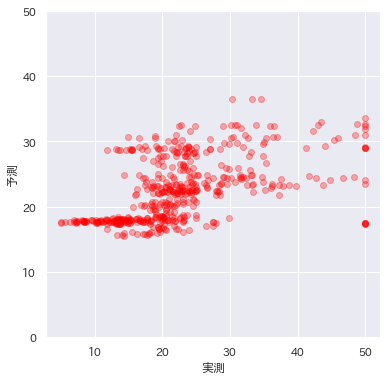

In [ ]:
X = df[['通勤', '教員比']]  # 二つ選ぶ
y = df['住宅価格']


model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred, color = 'red', alpha=0.3) 
plt.xlabel('実測')
plt.ylabel('予測')
plt.ylim(0, 50)
r2 = r2_score(y, y_pred)
print('決定係数(R2):', r2)

In [ ]:
for column in df.columns[:-1]:
    X = df[[column]]  # 1つ選ぶ
    y = df['住宅価格']
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    print(f'{column} 決定係数(R2):', r2)



犯罪率 決定係数(R2): 0.15078046904975717
緑地 決定係数(R2): 0.12992084489428946
工場 決定係数(R2): 0.2339900304444752
川近 決定係数(R2): 0.03071612970877491
大気汚染 決定係数(R2): 0.182603042501699
部屋数 決定係数(R2): 0.48352545599133423
築年 決定係数(R2): 0.14209474407780442
通勤 決定係数(R2): 0.062464372121782574
交通 決定係数(R2): 0.14563857991232532
資産税 決定係数(R2): 0.2195259210442193
教員比 決定係数(R2): 0.257847318009223
低所得率 決定係数(R2): 0.5441462975864797
